In [69]:
import numpy as np
import astropy.units as units
import matplotlib.pyplot as plt
import astropy.constants as csts
import scipy.constants as constants

The Rabi rate is given by  
$\Omega = \frac{\vec{d}\cdot \vec{E}_0}{\hbar}$,  
where $\vec{d}$ is the transition dipole moment and $\vec{E}_0$ is the vector electric field amplitude, including polarization.

The time averaged energy density of an electromagnetic wave is given by:  
$\langle U \rangle = \frac{n^2\epsilon_0}{2}|E|^2$.

The intensity is then given by:  
$I_{avg} = \frac{c\epsilon_0 E_0^2}{2}$,  
and the power by:  
$P = |I| A_{laser}$

In [11]:
@units.quantity_input
def calc_D_eff(Gamma: units.Hz, frequency: units.Hz):
    c = csts.c
    e0 = csts.eps0
    hbar = csts.hbar
    return np.sqrt( (Gamma) * 3*np.pi * e0 *hbar * c**3 / (2*np.pi * frequency)**3 ).decompose()

In [12]:
# Calculate effective dipole moment for the optical transitions
Gamma = units.Hz/100e-9 #Natural linewidth in 2*pi*Hz
f = units.Hz * csts.c.value/271.7e-9
D_eff = calc_D_eff(Gamma, f)
D_eff

<Quantity 2.66755059e-30 A m s>

In [88]:
@units.quantity_input
def calculate_power_needed(Omega: units.Hz, ME, σx: units.m, σy: units.m, D_TlF: units.A*units.s*units.m):
    """
    Function to calculate the power required to get peak Rabi rate Omega
    for a transition with given matrix element with a gaussian spatial profile
    """
    c = csts.c
    epsilon_0 = csts.eps0
    
    #Calculate the electric field required
    E =  Omega*csts.hbar/(ME*D_TlF)

    #Convert E to peak intensity
    I = 1/2 * c * epsilon_0 * E**2

    #Convert power to amplitude of the Gaussian
    P = I * (2*np.pi *σx*σy)

    return P.to(units.W)

In [89]:
σx = 2642*1e-6/4 * units.m # σ width of the laser.
σy = 5265*1e-6/4 * units.m # σ height of the laser

# ME_main is the coupling element from the main ground state to the main excited state
ME_main = -0.39444661441301954+0j
calculate_power_needed(4*Gamma*ME_main.real, ME_main.real, σx, σy, D_eff).to(units.mW)

<Quantity 18.1291519 mW>

In [55]:
calculate_power_needed(5*Gamma*ME_main.real, ME_main.real, σx, σy, D_eff).to(units.mW)

<Quantity 28.32679985 mW>

In [56]:
calculate_power_needed(6*Gamma*ME_main.real, ME_main.real, σx, σy, D_eff).to(units.mW)

<Quantity 40.79059178 mW>

In [57]:
calculate_power_needed(6.5*Gamma*ME_main.real, ME_main.real, σx, σy, D_eff).to(units.mW)

<Quantity 47.87229174 mW>

$\Omega$ seems to be rather large for our power. Must be an error somewhere, but haven't been able to find it yet.

In [61]:
@units.quantity_input
def sigma_to_fwhm(σ: units.m):
    return 2*np.sqrt(2*np.log(2))*σ

In [62]:
sigma_to_fwhm(σx)

<Quantity 0.00155536 m>

### Verifying 2D Gaussian Integral

In [63]:
def gaussian_2d(y,z,μy,μz,σy,σz):
    a = (y-μy)**2/(2*σy**2)
    b = (z-μz)**2/(2*σz**2)
    return np.exp(-(a+b))

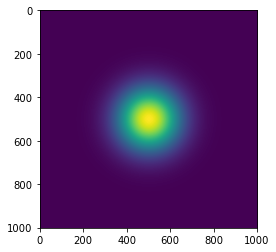

In [71]:
xi,yi = np.linspace(-5,5,1001)*σx, np.linspace(-5,5,1001)*σy
X,Y = np.meshgrid(xi,yi)
vals = gaussian_2d(X,Y,0,0,σx, σy)
plt.imshow(vals)

In [77]:
# numeric integral to verify
vals.sum()*np.diff(xi)[0]*np.diff(yi)[0]

<Quantity 5.46248918e-06 m2>

In [79]:
# analytic integral
2*np.pi*σx*σy

<Quantity 5.46249528e-06 m2>